In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob
import random
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from  keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from  tensorflow.keras import Input

In [3]:
input_image = Input(shape=(100, 100, 3))

In [4]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu'
                     ,input_shape=(100, 100, 3),padding='same'
                     )
              )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [5]:
df = pd.read_csv('data/all_data_info.csv')
df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
103245,Jackson Pollock,1948.0,abstract,682.0,220.0,96405.0,wikiart,Action painting,Number 13A (Arabesque),train_and_test,True,25525.jpg
103246,Bernardo Strozzi,NaN,religious painting,329.0,456.0,127594.0,wikiart,Baroque,St. Francis of Assisi,train_only,True,47038.jpg
103247,Josef Sima,NaN,landscape,293.0,512.0,102519.0,wikiart,Surrealism,Maisons à la campagne II,train_and_test,False,7680.jpg
103248,Brett Whiteley,1982.0,marina,293.0,512.0,167423.0,wikiart,NaN,Thebe's Revenge,train_and_test,True,9021.jpg


In [6]:
dataset_paths = glob.glob("./data/train/*.jpg")


In [7]:
df['impath'] = df.new_filename.map(lambda x : f'./data/train/{x}' if f'./data/train/{x}' in dataset_paths else '' )


In [8]:
df=df[df['impath']!='']

In [9]:
df_samp = df.sample(2000)

In [10]:
def open_image(pathim):
    try:
        return np.array(Image.open(pathim).resize((100,100)))
    except:
        return ''

In [11]:
df_samp['image'] = df_samp.new_filename.map(lambda x : open_image(f'./data/train/{x}'))

In [12]:
df_samp =df_samp[df_samp['image']!='']

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [13]:
df_samp['image_shape'] = df_samp.image.map(lambda x : x.shape )
df_samp= df_samp[df_samp['image_shape']==(100, 100, 3)]

In [14]:
df_samp['image_shape'].value_counts()

(100, 100, 3)    1974
Name: image_shape, dtype: int64

In [15]:
batch_size = 16
train_input_shape = (224, 224, 3)

In [16]:
X= df_samp.image
y=df_samp['artist']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
np.shape(X_train)

(1480,)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [19]:
X_train = np.array(list(X_train))

In [20]:
def initialize_model():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(709, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [22]:
model = initialize_model()
model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50


2022-10-19 12:29:52.933828: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 731) and (32, 709) are incompatible


In [ ]:
test=np.array([np.array(Image.open('./data/train/1541.jpg').resize((100,100)))])

In [ ]:
model.predict(test)


1/1 [==============================] - 0s 64ms/step


array([[0.0022264 , 0.00221044, 0.00223365, 0.00221113, 0.0022467 ,
        0.00221189, 0.00220132, 0.00222751, 0.00220606, 0.00222969,
        0.00221694, 0.00222416, 0.0022346 , 0.00223442, 0.00222689,
        0.00219716, 0.00219623, 0.00224436, 0.0022116 , 0.00221648,
        0.00223857, 0.00223644, 0.00221531, 0.0022148 , 0.00224107,
        0.00225336, 0.00223638, 0.00222778, 0.00221212, 0.00222775,
        0.00219739, 0.0022132 , 0.00223819, 0.00220132, 0.00223726,
        0.0022194 , 0.00221804, 0.00223652, 0.00224186, 0.00224166,
        0.00222469, 0.0022395 , 0.0022047 , 0.00220929, 0.00223723,
        0.0022276 , 0.00224075, 0.00220646, 0.00222774, 0.00223329,
        0.00223802, 0.00223324, 0.00219745, 0.00223622, 0.0022338 ,
        0.00220657, 0.00223091, 0.00222767, 0.0022276 , 0.00220474,
        0.00222822, 0.00222681, 0.00223621, 0.00219733, 0.0022365 ,
        0.00221609, 0.00222783, 0.00221838, 0.00224766, 0.00222794,
        0.00223314, 0.0022073 , 0.0022033 , 0.00

## Limiting to most famous painter

In [23]:
famous_artists = list(df.artist.value_counts().head(20).keys())

In [24]:
df_famous = df[df.artist.isin(famous_artists)]

In [25]:
df_famous

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,impath
14,Ivan Aivazovsky,1873,marina,7444.0,5811.0,3189597.0,wikiart,Romanticism,Storm at sea,train_and_test,True,99442.jpg,./data/train/99442.jpg
28,Gustave Dore,1866,religious painting,4915.0,6068.0,29811319.0,wikiart,Romanticism,Death of Eleazer,train_and_test,True,7486.jpg,./data/train/7486.jpg
82,Ivan Aivazovsky,1850,marina,5815.0,3840.0,16019462.0,wikiart,Romanticism,The Ninth Wave,train_and_test,True,81750.jpg,./data/train/81750.jpg
112,Rembrandt,NaN,portrait,4032.0,5008.0,1384905.0,wikiart,Baroque,Lady with a Lap Dog,train_and_test,True,40672.jpg,./data/train/40672.jpg
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),train_and_test,True,95360.jpg,./data/train/95360.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,Pyotr Konchalovsky,1928,flower painting,375.0,450.0,42300.0,wikiart,Post-Impressionism,Still Life. Orchids.,train_and_test,True,84241.jpg,./data/train/84241.jpg
101112,Pyotr Konchalovsky,1928,cityscape,450.0,375.0,36427.0,wikiart,Post-Impressionism,Novgorod. Kukui Tower.,train_and_test,True,41406.jpg,./data/train/41406.jpg
101114,Pyotr Konchalovsky,1932,still life,450.0,375.0,51658.0,wikiart,Realism,Still Life with a fly. Every victuals.,train_and_test,True,13943.jpg,./data/train/13943.jpg
101176,Pyotr Konchalovsky,1908,portrait,374.0,450.0,50917.0,wikiart,Post-Impressionism,Paris. The boy with the apple. (Portrait of Mi...,train_and_test,True,101511.jpg,./data/train/101511.jpg


In [26]:
df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))

/var/folders/bs/_70c1r1x1276_9vpf7t82hdr0000gn/T/ipykernel_79729/1592678099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))


In [27]:
df_famous=df_famous[df_famous['image']!='']
df_famous['image_shape'] = df_famous.image.map(lambda x : x.shape )
df_famous= df_famous[df_famous['image_shape']==(100, 100, 3)]

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
/var/folders/bs/_70c1r1x1276_9vpf7t82hdr0000gn/T/ipykernel_79729/2245549552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous['image_shape'] = df_famous.image.map(lambda x : x.shape )


In [28]:
X= df_famous.image
y=df_famous['artist']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [31]:
def model_20():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(20, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [32]:
model = model_20()
history = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50
119/119 [==============================] - 7s 57ms/step - loss: 2.9901 - accuracy: 0.0718 - val_loss: 2.9388 - val_accuracy: 0.1175
Epoch 2/50
119/119 [==============================] - 7s 57ms/step - loss: 2.8151 - accuracy: 0.1308 - val_loss: 2.7836 - val_accuracy: 0.1979
Epoch 3/50
119/119 [==============================] - 7s 56ms/step - loss: 2.6817 - accuracy: 0.1861 - val_loss: 2.6762 - val_accuracy: 0.2455
Epoch 4/50
119/119 [==============================] - 6s 54ms/step - loss: 2.5564 - accuracy: 0.2245 - val_loss: 2.6013 - val_accuracy: 0.2286
Epoch 5/50
119/119 [==============================] - 6s 54ms/step - loss: 2.4583 - accuracy: 0.2513 - val_loss: 2.4694 - val_accuracy: 0.2804
Epoch 6/50
119/119 [==============================] - 7s 56ms/step - loss: 2.3763 - accuracy: 0.2671 - val_loss: 2.3786 - val_accuracy: 0.2963
Epoch 7/50
119/119 [==============================] - 7s 56ms/step - loss: 2.2857 - accuracy: 0.2912 - val_loss: 2.3795 - val_accuracy: 0.3122

In [33]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

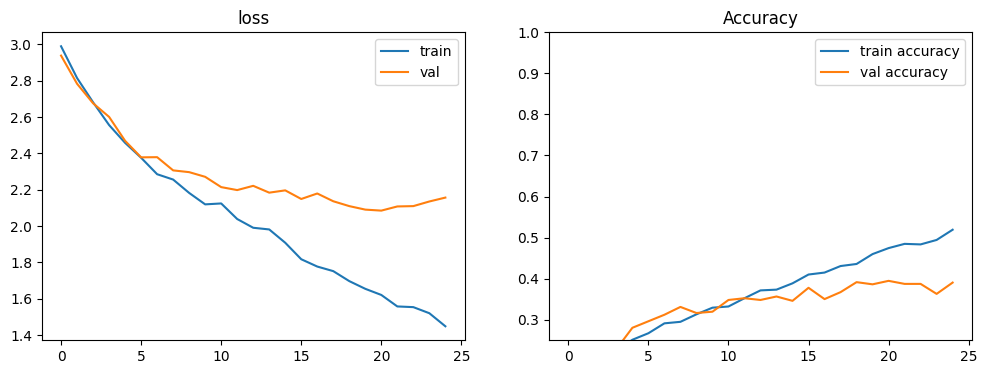

In [34]:
plot_history(history)

In [35]:
test = np.array([np.array(Image.open('./data/test/cmonet.jpg').resize((100,100)))])


In [36]:
test.shape

(1, 100, 100, 3)

In [37]:
famous_artists[np.argmax(model.predict(test))]


1/1 [==============================] - 0s 63ms/step


'Theophile Steinlen'

In [ ]:
famous_artists

['Boris Kustodiev',
 'Pierre-Auguste Renoir',
 'Ilya Repin',
 'Claude Monet',
 'Pyotr Konchalovsky',
 'John Singer Sargent',
 'Paul Cezanne',
 'Ivan Aivazovsky',
 'Odilon Redon',
 'Camille Pissarro',
 'Paul Gauguin',
 'Fernand Leger',
 'Eugene Boudin',
 'Edgar Degas',
 'Albrecht Durer',
 'Camille Corot',
 'Zdislav Beksinski',
 'Marc Chagall',
 'Giovanni Battista Piranesi',
 'Pablo Picasso']

## Data augmentation

In [39]:

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [44]:
len(X_train)*.8

3777.6000000000004

In [47]:
X_tr = X_train[:3777]
y_tr = y_train[:3777]
X_val = X_train[3777:]
y_val = y_train[3777:]


train_flow = datagen.flow(X_tr, y_tr, batch_size = 32)

model = model_20()

# The fit
history_aug = model.fit(train_flow, 
                        epochs = 50, 
                        callbacks = [es], 
                        validation_data = (X_val, y_val))

Epoch 1/50
119/119 [==============================] - 9s 65ms/step - loss: 21.5606 - accuracy: 0.0461 - val_loss: 2.9953 - val_accuracy: 0.0476
Epoch 2/50
119/119 [==============================] - 8s 63ms/step - loss: 2.9983 - accuracy: 0.0532 - val_loss: 2.9950 - val_accuracy: 0.0519
Epoch 3/50
119/119 [==============================] - 7s 58ms/step - loss: 2.9938 - accuracy: 0.0530 - val_loss: 2.9946 - val_accuracy: 0.0519
Epoch 4/50
119/119 [==============================] - 7s 58ms/step - loss: 2.9931 - accuracy: 0.0553 - val_loss: 2.9942 - val_accuracy: 0.0519
Epoch 5/50
119/119 [==============================] - 7s 59ms/step - loss: 2.9925 - accuracy: 0.0553 - val_loss: 2.9941 - val_accuracy: 0.0519
Epoch 6/50
119/119 [==============================] - 7s 61ms/step - loss: 2.9920 - accuracy: 0.0553 - val_loss: 2.9938 - val_accuracy: 0.0519
Epoch 7/50
119/119 [==============================] - 8s 64ms/step - loss: 2.9916 - accuracy: 0.0553 - val_loss: 2.9940 - val_accuracy: 0.051

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

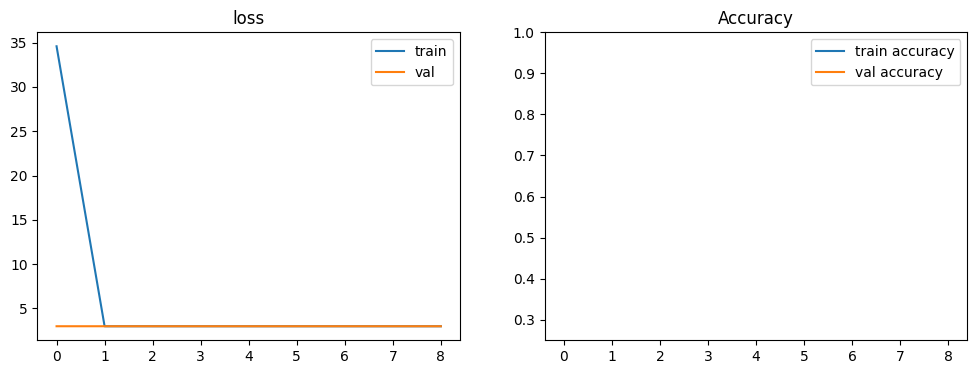

In [46]:
plot_history(history_aug)